In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\vkhosla\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\vkhosla\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\vkhosla\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv(r'downloads\medical_examination.csv')
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  overweight   70000 non-null  int32  
dtypes: float64(1), int32(1), int64(12)
memory usage: 7.2 MB


In [83]:
df['overweight'] = (df['weight']/((df['height']/100)**2)).apply(lambda x : 1 if x>25 else 0)

In [84]:
#Normalize data by making 0 always good and 1 always bad. 
#If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1
df['cholesterol'] = df['cholesterol'].apply (lambda x:0 if x==1 else 1)
df['gluc'] = df['gluc'].apply (lambda x:0 if x==1 else 1)




In [85]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [ ]:
def draw_cat_plot():

In [86]:
df_cat = pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [87]:
 df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')


In [50]:
df_cat.variable.unique()

array(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'],
      dtype=object)

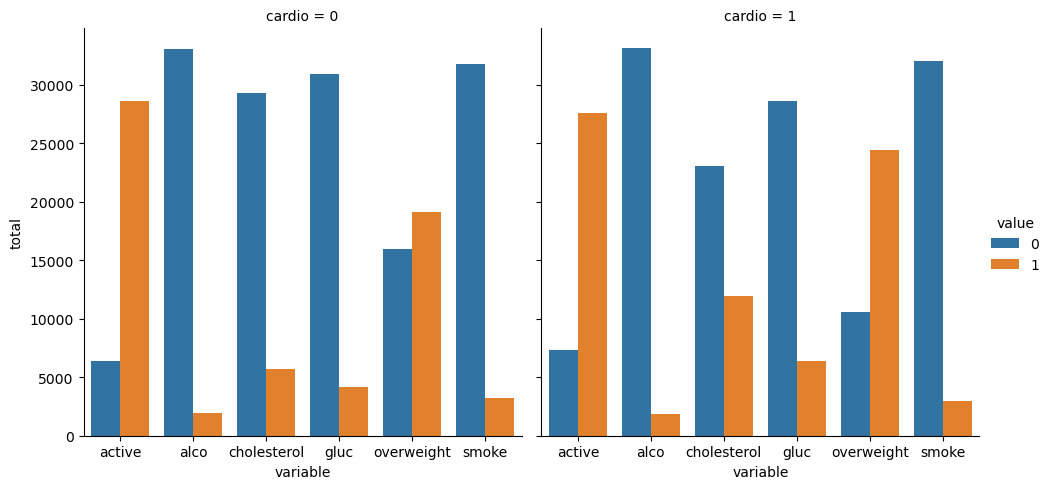

In [88]:
sns.catplot(x='variable', y='total', hue='value', col='cardio', data=df_cat, kind='bar')

In [89]:
#diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
#height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
#height is more than the 97.5th percentile
#weight is less than the 2.5th percentile
#weight is more than the 97.5th percentile
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) 
& (df['weight'] <= df['weight'].quantile(0.975))] 



In [90]:
corr = df_heat.corr(method='pearson')
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [91]:
mask = np.triu(corr)
mask

array([[ 1.00000000e+00,  2.50729691e-03,  3.42610273e-03,
         3.25916709e-04,  1.49333224e-04,  3.49238023e-03,
         4.83670793e-04,  3.71939143e-03,  2.28909034e-03,
        -2.73227725e-03, -7.08059804e-04,  5.89114223e-03,
         3.90011059e-03, -6.79420314e-04],
       [ 0.00000000e+00,  1.00000000e+00, -1.81320052e-02,
        -7.69318347e-02,  7.01683896e-02,  1.86894095e-02,
         1.53507973e-01,  1.29996176e-01,  8.69901449e-02,
        -4.43706471e-02, -2.69695382e-02, -1.14451266e-02,
         2.40241089e-01,  8.95726547e-02],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         5.05784851e-01,  1.29979320e-01,  5.06250408e-03,
         5.99466484e-02, -3.76050443e-02, -2.13573847e-02,
         3.37435881e-01,  1.68637124e-01,  7.86370242e-03,
         2.31999158e-03, -5.29296848e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  2.51502865e-01,  4.58573625e-03,
         1.79224331e-02, -6.35217890e-02, -3.

<AxesSubplot:>

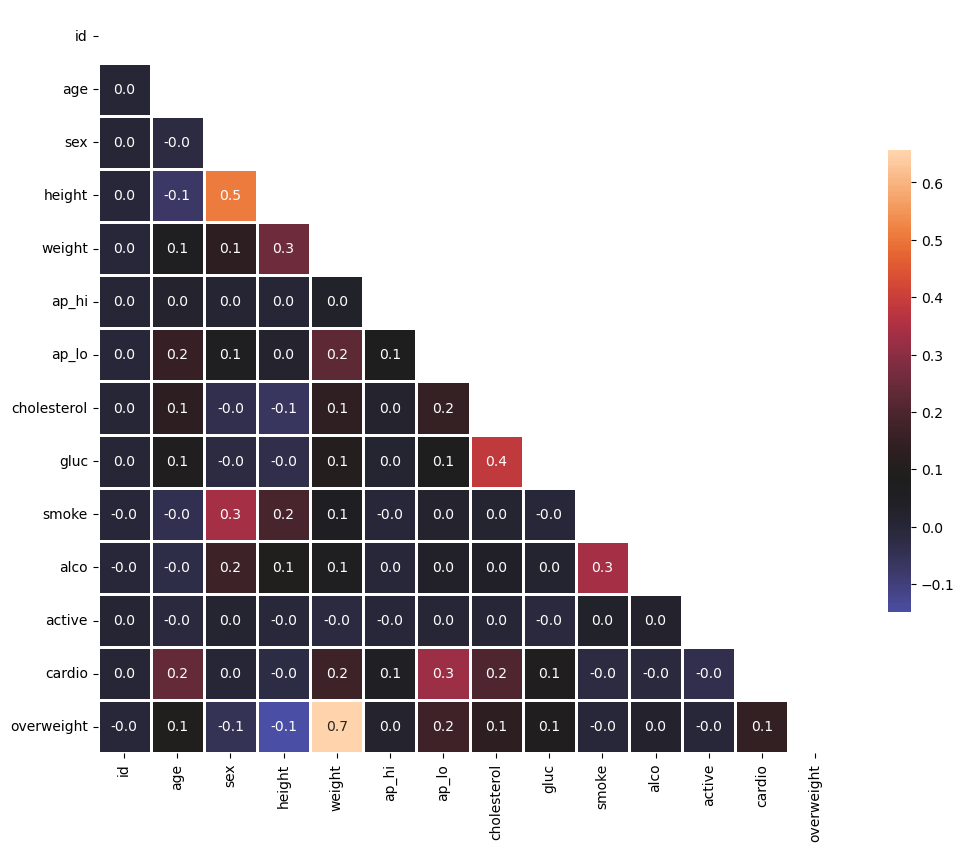

In [96]:
plt.subplots(figsize =(12,12))
sns.heatmap(corr,linewidths=1,annot=True,square=True,mask=mask,fmt=".1f", center=0.08,cbar_kws={"shrink":0.5})